In [1]:
#importing 
pip install pandas
pip install numpy
pip install seaborn
pip install matplotlib

SyntaxError: invalid syntax (532547928.py, line 1)

In [3]:
#reading data
import pandas as pd
print(pd.__version__)
data=pd.read_csv('Air_Quality_Index_Prediction.csv')


2.2.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           1000 non-null   object 
 1   Temperature        856 non-null    float64
 2   Humidity           1000 non-null   float64
 3   Wind_Speed         921 non-null    float64
 4   CO2_Concentration  902 non-null    float64
 5   PM2.5              1000 non-null   float64
 6   PM10               1000 non-null   float64
 7   Ozone              1000 non-null   float64
 8   NO2                1000 non-null   float64
 9   AQI                1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [7]:
data.head()


,Location,Temperature,Humidity,Wind_Speed,CO2_Concentration,PM2.5,PM10,Ozone,NO2,AQI
0,Lewisville,NaN,49.758861,4.789316,439.722651,142.037179,97.632008,64.629757,82.725816,132
1,Blackwellland,38.547172,40.989086,21.712212,205.177936,13.492750,138.451130,59.361529,19.537192,363
2,Espinozaland,38.440156,84.433332,6.825366,221.980313,14.135497,197.258623,137.524336,44.378241,243
3,South Kyleberg,23.068725,70.969272,1.987080,422.081051,114.108689,133.820482,136.580133,14.355223,45
4,Lake Michael,34.318472,51.910465,15.946304,419.037669,51.150481,78.274104,60.850595,28.066408,386


In [9]:
#importing
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
data=pd.read_csv('Air_Quality_Index_Prediction.csv')
import pandas as pd
#describing the data
data.describe()


,Temperature,Humidity,Wind_Speed,CO2_Concentration,PM2.5,PM10,Ozone,NO2,AQI
count,856.000000,1000.000000,921.000000,902.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.354278,59.448890,12.022069,350.094972,77.878630,103.553435,90.843822,54.099085,247.998000
std,7.290579,17.191487,7.139517,87.002266,42.175321,54.060107,34.957483,26.776687,144.745934
min,15.016780,30.045804,0.024855,200.056788,5.205739,10.228072,30.112829,10.023514,0.000000
25%,20.837267,44.529851,5.687029,278.645912,41.505273,56.946209,61.473948,31.519836,127.000000
50%,27.149588,59.664987,12.170056,349.793079,76.614242,101.505806,90.591748,53.135105,246.500000
75%,33.672733,73.969582,18.004906,425.980963,115.480727,150.817141,121.335270,77.863416,374.000000
max,39.941480,89.990103,24.887414,499.964482,149.859517,199.779593,149.903278,99.917093,499.000000


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

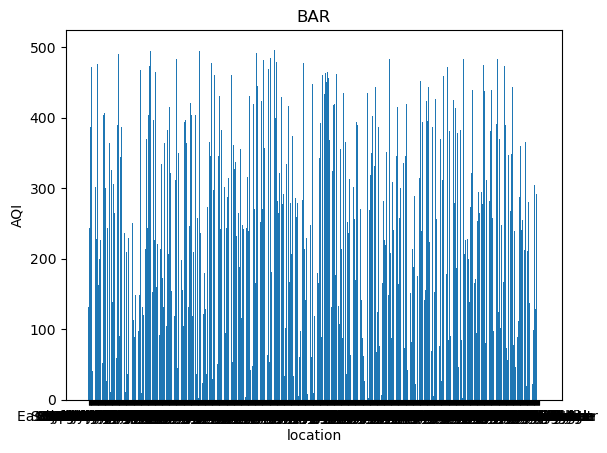

In [11]:
#visualization
mp.bar(data['Location'],data['AQI'])
mp.xlabel('location')
mp.ylabel('AQI')
mp.title('BAR')
mp

In [13]:
#finding the no.of nulls to each coloumn
data.isnull().sum()


Location               0
Temperature          144
Humidity               0
Wind_Speed            79
CO2_Concentration     98
PM2.5                  0
PM10                   0
Ozone                  0
NO2                    0
AQI                    0
dtype: int64

In [15]:
#filling numeric values with mean
data['Wind_Speed']=data['Wind_Speed'].fillna(data['Wind_Speed'].mean())

data['CO2_Concentration']=data['CO2_Concentration'].fillna(data['CO2_Concentration'].mean())
data['Temperature']=data['Temperature'].fillna(data['Temperature'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   Wind_Speed         1000 non-null   float64
 4   CO2_Concentration  1000 non-null   float64
 5   PM2.5              1000 non-null   float64
 6   PM10               1000 non-null   float64
 7   Ozone              1000 non-null   float64
 8   NO2                1000 non-null   float64
 9   AQI                1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [ ]:

#

In [25]:
#scaling numerical features with minmaxscaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['Temperature'] = scaler.fit_transform(data[['Temperature']])
data['Humidity'] = scaler.fit_transform(data[['Humidity']])
data['Wind_Speed'] = scaler.fit_transform(data[['Wind_Speed']])
data['CO2_Concentration'] = scaler.fit_transform(data[['CO2_Concentration']])
data['PM2.5'] = scaler.fit_transform(data[['PM2.5']])
data['PM10'] = scaler.fit_transform(data[['PM10']])
data['Ozone'] = scaler.fit_transform(data[['Ozone']])
data['NO2'] = scaler.fit_transform(data[['NO2']])


In [27]:
#spliting data into train and test
x=data[['Temperature', 'Humidity', 'Wind_Speed', 'CO2_Concentration', 'PM2.5', 'PM10', 'Ozone', 'NO2']]
y=data['AQI']

In [198]:
#selection
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=60)

In [200]:
#train random forest classifer model
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)



RandomForestRegressor()

In [201]:
#evaluation 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
rf_pred=rf_model.predict(x_test)
rf_mse=mean_squared_error(y_test,rf_pred)
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)
print(f'Mean squared error:{rf_mse}')
print(f'Mean absolute error:{rf_mae}')
print(f'R squared :{rf_r2}')

Mean squared error:23514.397861
Mean absolute error:133.25029999999998
R squared :-0.036634552244580565


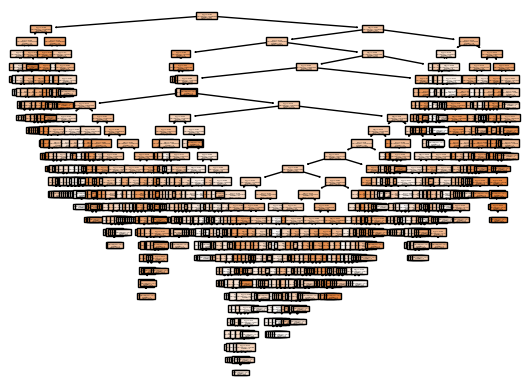

Best model saved as 'best_model.pkl'


In [209]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pickle
# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()
# Select the best model
best_model =rf_model 
# Save the best model as a .pkl file
with open('best_model.pkl', 'wb') as file:
 pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")